In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sb
sb.set()
import os
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
import warnings
warnings.filterwarnings("ignore")

In [4]:
tennisData = pd.read_csv("data_used.csv")
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
tennisData.head(5)

,tourney_id,tourney_name,surface,tourney_level,tourney_date,winner_id,winner_seed,winner_name,winner_hand,winner_ioc,winner_age,loser_id,loser_seed,loser_name,loser_hand,loser_ioc,loser_age,score,best_of,round,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,1991-339,Adelaide,Hard,A,1990-12-31,101723,0.0,Magnus Larsson,R,SWE,20.7,101414,1.0,Boris Becker,R,GER,23.1,6-4 3-6 7-6(2),3,R32,6.0,2.0,96.0,55.0,39.0,25.0,15.0,2.0,4.0,8.0,3.0,95.0,62.0,44.0,23.0,16.0,6.0,8.0
1,1991-339,Adelaide,Hard,A,1990-12-31,100946,0.0,Slobodan Zivojinovic,R,YUG,27.4,101256,0.0,Mark Kratzmann,L,AUS,24.6,6-3 3-6 7-6(6),3,R32,19.0,4.0,101.0,56.0,45.0,25.0,15.0,9.0,10.0,8.0,2.0,84.0,41.0,35.0,27.0,15.0,1.0,2.0
2,1991-339,Adelaide,Hard,A,1990-12-31,101234,0.0,Patrik Kuhnen,R,GER,24.8,101421,0.0,Veli Paloheimo,R,FIN,23.0,6-0 6-4,3,R32,6.0,1.0,54.0,31.0,24.0,13.0,8.0,1.0,1.0,2.0,2.0,60.0,37.0,22.0,6.0,8.0,4.0,8.0
3,1991-339,Adelaide,Hard,A,1990-12-31,101889,8.0,Todd Woodbridge,R,AUS,19.7,101703,0.0,Guillaume Raoux,R,FRA,20.8,7-6(2) 6-1,3,R32,2.0,0.0,60.0,40.0,30.0,14.0,9.0,3.0,3.0,3.0,3.0,74.0,45.0,30.0,11.0,10.0,5.0,8.0
4,1991-339,Adelaide,Hard,A,1990-12-31,101274,0.0,Udo Riglewski,R,GER,24.4,101843,4.0,Sergi Bruguera,R,ESP,19.9,7-5 6-3,3,R32,4.0,2.0,72.0,40.0,33.0,14.0,10.0,7.0,8.0,2.0,2.0,77.0,41.0,28.0,15.0,11.0,4.0,8.0


In [5]:
import pandas as pd

# Assuming tennisData is your original DataFrame
df = tennisData[['tourney_id','winner_id', 'winner_age', 'winner_hand', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn','w_1stWon','w_2ndWon','w_SvGms','w_bpSaved','w_bpFaced',
                 'loser_id', 'loser_age', 'loser_hand', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn','l_1stWon','l_2ndWon',	'l_SvGms','l_bpSaved','l_bpFaced'
                ]].copy()

# Rename columns for clarity
df = df.rename(columns={
    'tourney_id':'match_id','winner_id': 'p1_id', 'winner_age': 'p1_age', 'winner_hand': 'p1_hand', 'w_ace': 'p1_ace', 
    'w_df': 'p1_df', 'w_svpt': 'p1_svpt', 'w_1stIn' : 'p1_1stIn','w_1stWon' : 'p1_1stWon','w_2ndWon' : 'p1_2ndWon','w_SvGms' :'p1_SvGms','w_bpSaved' :'p1_bpSaved' ,'w_bpFaced':'p1_bpFaced',
    'loser_id': 'p2_id', 'loser_age': 'p2_age', 'loser_hand': 'p2_hand', 'l_ace': 'p2_ace', 
    'l_df': 'p2_df', 'l_svpt': 'p2_svpt', 'l_1stIn':'p2_1stIn' ,'l_1stWon':'p2_1stWon','l_2ndWon':'p2_2ndWon','l_SvGms':'p2_SvGms','l_bpSaved':"p2_bpSaved",'l_bpFaced' : 'p2_bpFaced',
})

# Add a target label (1 if Player 1 won, 0 if Player 2 won)
df['outcome'] = (df['p1_id'] == tennisData['winner_id']).astype(int)

df.head(5)


,match_id,p1_id,p1_age,p1_hand,p1_ace,p1_df,p1_svpt,p1_1stIn,p1_1stWon,p1_2ndWon,p1_SvGms,p1_bpSaved,p1_bpFaced,p2_id,p2_age,p2_hand,p2_ace,p2_df,p2_svpt,p2_1stIn,p2_1stWon,p2_2ndWon,p2_SvGms,p2_bpSaved,p2_bpFaced,outcome
0,1991-339,101723,20.7,R,6.0,2.0,96.0,55.0,39.0,25.0,15.0,2.0,4.0,101414,23.1,R,8.0,3.0,95.0,62.0,44.0,23.0,16.0,6.0,8.0,1
1,1991-339,100946,27.4,R,19.0,4.0,101.0,56.0,45.0,25.0,15.0,9.0,10.0,101256,24.6,L,8.0,2.0,84.0,41.0,35.0,27.0,15.0,1.0,2.0,1
2,1991-339,101234,24.8,R,6.0,1.0,54.0,31.0,24.0,13.0,8.0,1.0,1.0,101421,23.0,R,2.0,2.0,60.0,37.0,22.0,6.0,8.0,4.0,8.0,1
3,1991-339,101889,19.7,R,2.0,0.0,60.0,40.0,30.0,14.0,9.0,3.0,3.0,101703,20.8,R,3.0,3.0,74.0,45.0,30.0,11.0,10.0,5.0,8.0,1
4,1991-339,101274,24.4,R,4.0,2.0,72.0,40.0,33.0,14.0,10.0,7.0,8.0,101843,19.9,R,2.0,2.0,77.0,41.0,28.0,15.0,11.0,4.0,8.0,1


In [6]:

# Add a target label (1 if Player 1 won, 0 if Player 2 won)
df['outcome'] = (df['p1_id'] == tennisData['winner_id']).astype(int)

# Step 1: Shuffle player positions in the dataset to avoid positional bias
def randomize_player_positions(df):
    """
    Randomly swap player positions in the dataset to prevent model from
    associating the first position with the winner.
    
    Parameters:
        df (DataFrame): The original dataset with match ID, winner, and loser data.
        
    Returns:
        DataFrame: The modified dataset with randomized player positions.
    """
    dfr = df.copy()  # Work on a copy of the DataFrame to avoid modifying the original

    # Generate a boolean array where True means swap players
    swap_mask = np.random.rand(len(dfr)) > 0.5

    # Swap columns based on the mask
    dfr.loc[swap_mask, ['p1_id', 'p2_id']] = dfr.loc[swap_mask, ['p2_id', 'p1_id']].values
    dfr.loc[swap_mask, ['p1_age', 'p2_age']] = dfr.loc[swap_mask, ['p2_age', 'p1_age']].values
    dfr.loc[swap_mask, ['p1_df', 'p2_df']] = dfr.loc[swap_mask, ['p2_df', 'p1_df']].values
    dfr.loc[swap_mask, ['p1_hand', 'p2_hand']] = dfr.loc[swap_mask, ['p2_hand', 'p1_hand']].values
    dfr.loc[swap_mask, ['p1_ace', 'p2_ace']] = dfr.loc[swap_mask, ['p2_ace', 'p1_ace']].values
    dfr.loc[swap_mask, ['p1_svpt', 'p2_svpt']] = dfr.loc[swap_mask, ['p2_svpt', 'p1_svpt']].values
    dfr.loc[swap_mask, ['p1_1stIn', 'p2_1stIn']] = dfr.loc[swap_mask, ['p2_1stIn', 'p1_1stIn']].values
    dfr.loc[swap_mask, ['p1_1stWon', 'p2_1stWon']] = dfr.loc[swap_mask, ['p2_1stWon', 'p1_1stWon']].values
    dfr.loc[swap_mask, ['p1_2ndWon', 'p2_2ndWon']] = dfr.loc[swap_mask, ['p2_2ndWon', 'p1_2ndWon']].values
    dfr.loc[swap_mask, ['p1_SvGms', 'p2_SvGms']] = dfr.loc[swap_mask, ['p2_SvGms', 'p1_SvGms']].values
    dfr.loc[swap_mask, ['p1_bpSaved', 'p2_bpSaved']] = dfr.loc[swap_mask, ['p2_bpSaved', 'p1_bpSaved']].values
    dfr.loc[swap_mask, ['p1_bpFaced', 'p2_bpFaced']] = dfr.loc[swap_mask, ['p2_bpFaced', 'p1_bpFaced']].values

    # Update the outcome label accordingly
    dfr.loc[swap_mask, 'outcome'] = 1 - dfr.loc[swap_mask, 'outcome']
    
    return dfr

# Apply randomization to the training data
df_randomized = randomize_player_positions(df)

# Verify that match_id is intact
print(df_randomized[['match_id', 'p1_id', 'p2_id', 'outcome']].head(4))


   match_id   p1_id   p2_id  outcome
0  1991-339  101414  101723        0
1  1991-339  101256  100946        0
2  1991-339  101421  101234        0
3  1991-339  101703  101889        0


In [7]:
# Check original vs randomized for a sample of matches
sample_size = 5
sample_indices = np.random.choice(df.index, size=sample_size, replace=False)

# Original Data
print("Original Data Sample:")
print(df.loc[sample_indices, ['match_id', 'p1_id', 'p2_id', 'outcome']])

# Randomized Data
print("\nRandomized Data Sample:")
print(df_randomized.loc[sample_indices, ['match_id', 'p1_id', 'p2_id', 'outcome']])


Original Data Sample:
         match_id   p1_id   p2_id  outcome
11713    1994-741  102158  101481        1
22098    1997-421  102856  102021        1
64260    2012-747  104755  105051        1
104923  2011-6250  104547  104724        1
167601  2020-8297  106348  111790        1

Randomized Data Sample:
         match_id   p1_id   p2_id  outcome
11713    1994-741  101481  102158        0
22098    1997-421  102856  102021        1
64260    2012-747  104755  105051        1
104923  2011-6250  104547  104724        1
167601  2020-8297  111790  106348        0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Encode categorical 'hand' columns
label_encoder = LabelEncoder()
df_randomized['p1_hand'] = label_encoder.fit_transform(df_randomized['p1_hand'])
df_randomized['p2_hand'] = label_encoder.transform(df_randomized['p2_hand'])

# Create difference-based features
df_randomized['age_diff'] = df_randomized['p1_age'] - df_randomized['p2_age']
df_randomized['ace_diff'] = df_randomized['p1_ace'] - df_randomized['p2_ace']
df_randomized['df_diff'] = df_randomized['p1_df'] - df_randomized['p2_df']
df_randomized['svpt_diff'] = df_randomized['p1_svpt'] - df_randomized['p2_svpt']
df_randomized['bpSaved_diff'] = df_randomized['p1_bpSaved'] - df_randomized['p2_bpSaved']
df_randomized['bpFaced_diff'] = df_randomized['p1_bpFaced'] - df_randomized['p2_bpFaced']
df_randomized['firstIn_diff'] = df_randomized['p1_1stIn'] - df_randomized['p2_1stIn']
df_randomized['firstWon_diff'] = df_randomized['p1_1stWon'] - df_randomized['p2_1stWon']
df_randomized['secondWon_diff'] = df_randomized['p1_2ndWon'] - df_randomized['p2_2ndWon']
df_randomized['svGms_diff'] = df_randomized['p1_SvGms'] - df_randomized['p2_SvGms']

# Define features and target
features = ['p1_age', 'p1_hand', 'p1_ace', 'p1_df', 'p1_svpt',
            'p1_1stIn', 'p1_1stWon', 'p1_2ndWon', 'p1_SvGms',
            'p1_bpSaved', 'p1_bpFaced', 
            'p2_age', 'p2_hand', 'p2_ace', 'p2_df', 'p2_svpt',
            'p2_1stIn', 'p2_1stWon', 'p2_2ndWon', 'p2_SvGms',
            'p2_bpSaved', 'p2_bpFaced',
            'age_diff', 'ace_diff', 'df_diff', 'svpt_diff',
            'bpSaved_diff', 'bpFaced_diff', 'firstIn_diff', 
            'firstWon_diff', 'secondWon_diff', 'svGms_diff']

X = df_randomized[features]
y = df_randomized['outcome']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Output results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.9458400977422217
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95     29500
           1       0.95      0.94      0.95     30249

    accuracy                           0.95     59749
   macro avg       0.95      0.95      0.95     59749
weighted avg       0.95      0.95      0.95     59749



In [9]:
df_randomized.head(5)

,match_id,p1_id,p1_age,p1_hand,p1_ace,p1_df,p1_svpt,p1_1stIn,p1_1stWon,p1_2ndWon,p1_SvGms,p1_bpSaved,p1_bpFaced,p2_id,p2_age,p2_hand,p2_ace,p2_df,p2_svpt,p2_1stIn,p2_1stWon,p2_2ndWon,p2_SvGms,p2_bpSaved,p2_bpFaced,outcome,age_diff,ace_diff,df_diff,svpt_diff,bpSaved_diff,bpFaced_diff,firstIn_diff,firstWon_diff,secondWon_diff,svGms_diff
0,1991-339,101414,23.1,2,8.0,3.0,95.0,62.0,44.0,23.0,16.0,6.0,8.0,101723,20.7,2,6.0,2.0,96.0,55.0,39.0,25.0,15.0,2.0,4.0,0,2.4,2.0,1.0,-1.0,4.0,4.0,7.0,5.0,-2.0,1.0
1,1991-339,101256,24.6,1,8.0,2.0,84.0,41.0,35.0,27.0,15.0,1.0,2.0,100946,27.4,2,19.0,4.0,101.0,56.0,45.0,25.0,15.0,9.0,10.0,0,-2.8,-11.0,-2.0,-17.0,-8.0,-8.0,-15.0,-10.0,2.0,0.0
2,1991-339,101421,23.0,2,2.0,2.0,60.0,37.0,22.0,6.0,8.0,4.0,8.0,101234,24.8,2,6.0,1.0,54.0,31.0,24.0,13.0,8.0,1.0,1.0,0,-1.8,-4.0,1.0,6.0,3.0,7.0,6.0,-2.0,-7.0,0.0
3,1991-339,101703,20.8,2,3.0,3.0,74.0,45.0,30.0,11.0,10.0,5.0,8.0,101889,19.7,2,2.0,0.0,60.0,40.0,30.0,14.0,9.0,3.0,3.0,0,1.1,1.0,3.0,14.0,2.0,5.0,5.0,0.0,-3.0,1.0
4,1991-339,101843,19.9,2,2.0,2.0,77.0,41.0,28.0,15.0,11.0,4.0,8.0,101274,24.4,2,4.0,2.0,72.0,40.0,33.0,14.0,10.0,7.0,8.0,0,-4.5,-2.0,0.0,5.0,-3.0,0.0,1.0,-5.0,1.0,1.0


In [10]:
df_randomized.to_csv("RanFor_data.csv",index = False)

In [11]:
RanFor = pd.read_csv("RanFor_data.csv")
RanFor.head(5)

,match_id,p1_id,p1_age,p1_hand,p1_ace,p1_df,p1_svpt,p1_1stIn,p1_1stWon,p1_2ndWon,p1_SvGms,p1_bpSaved,p1_bpFaced,p2_id,p2_age,p2_hand,p2_ace,p2_df,p2_svpt,p2_1stIn,p2_1stWon,p2_2ndWon,p2_SvGms,p2_bpSaved,p2_bpFaced,outcome,age_diff,ace_diff,df_diff,svpt_diff,bpSaved_diff,bpFaced_diff,firstIn_diff,firstWon_diff,secondWon_diff,svGms_diff
0,1991-339,101414,23.1,2,8.0,3.0,95.0,62.0,44.0,23.0,16.0,6.0,8.0,101723,20.7,2,6.0,2.0,96.0,55.0,39.0,25.0,15.0,2.0,4.0,0,2.4,2.0,1.0,-1.0,4.0,4.0,7.0,5.0,-2.0,1.0
1,1991-339,101256,24.6,1,8.0,2.0,84.0,41.0,35.0,27.0,15.0,1.0,2.0,100946,27.4,2,19.0,4.0,101.0,56.0,45.0,25.0,15.0,9.0,10.0,0,-2.8,-11.0,-2.0,-17.0,-8.0,-8.0,-15.0,-10.0,2.0,0.0
2,1991-339,101421,23.0,2,2.0,2.0,60.0,37.0,22.0,6.0,8.0,4.0,8.0,101234,24.8,2,6.0,1.0,54.0,31.0,24.0,13.0,8.0,1.0,1.0,0,-1.8,-4.0,1.0,6.0,3.0,7.0,6.0,-2.0,-7.0,0.0
3,1991-339,101703,20.8,2,3.0,3.0,74.0,45.0,30.0,11.0,10.0,5.0,8.0,101889,19.7,2,2.0,0.0,60.0,40.0,30.0,14.0,9.0,3.0,3.0,0,1.1,1.0,3.0,14.0,2.0,5.0,5.0,0.0,-3.0,1.0
4,1991-339,101843,19.9,2,2.0,2.0,77.0,41.0,28.0,15.0,11.0,4.0,8.0,101274,24.4,2,4.0,2.0,72.0,40.0,33.0,14.0,10.0,7.0,8.0,0,-4.5,-2.0,0.0,5.0,-3.0,0.0,1.0,-5.0,1.0,1.0


In [12]:
# Adjusted code to use `TenData` instead of `df_randomized` and re-run the aggregation

# Load the original dataset under the new variable name for consistency with user's request
TenData = RanFor  # Assuming `df_randomized` was the original dataset name

# Separate player 1 and player 2 data
player1_data = TenData[['p1_id', 'p1_age', 'p1_hand', 'p1_ace', 'p1_df', 'p1_svpt', 
                        'p1_1stIn', 'p1_1stWon', 'p1_2ndWon', 'p1_SvGms', 'p1_bpSaved', 'p1_bpFaced']].copy()
player2_data = TenData[['p2_id', 'p2_age', 'p2_hand', 'p2_ace', 'p2_df', 'p2_svpt', 
                        'p2_1stIn', 'p2_1stWon', 'p2_2ndWon', 'p2_SvGms', 'p2_bpSaved', 'p2_bpFaced']].copy()

# Rename columns for consistency
player1_data.columns = ['player_id', 'age', 'hand', 'ace', 'df', 'svpt', '1stIn', '1stWon', '2ndWon', 'SvGms', 'bpSaved', 'bpFaced']
player2_data.columns = ['player_id', 'age', 'hand', 'ace', 'df', 'svpt', '1stIn', '1stWon', '2ndWon', 'SvGms', 'bpSaved', 'bpFaced']

# Concatenate the data
all_players_data = pd.concat([player1_data, player2_data])

# Compute aggregate statistics for each player
player_stats = all_players_data.groupby('player_id').agg({
    'age': 'mean',
    'hand': 'first',  # Assuming hand doesn't change per player
    'ace': 'mean',
    'df': 'mean',
    'svpt': 'mean',
    '1stIn': 'mean',
    '1stWon': 'mean',
    '2ndWon': 'mean',
    'SvGms': 'mean',
    'bpSaved': 'mean',
    'bpFaced': 'mean'
}).reset_index()

# Display the aggregated player stats to the use

In [13]:
player_stats.head(5)

,player_id,age,hand,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced
0,100282,39.800000,1,0.000000,2.500000,96.000000,67.500000,40.500000,14.500000,15.000000,3.500000,8.500000
1,100284,39.726923,1,1.794872,2.512821,83.846154,54.564103,34.294872,14.679487,12.538462,5.128205,8.846154
2,100286,38.400000,2,0.000000,2.000000,60.000000,32.000000,18.000000,6.000000,9.000000,8.000000,15.000000
3,100321,39.000000,2,0.000000,0.000000,48.000000,34.000000,14.000000,7.000000,9.000000,2.000000,8.000000
4,100431,36.350000,2,4.000000,2.000000,76.000000,46.500000,30.500000,12.500000,12.000000,5.500000,10.000000


In [14]:
def predict_match_probability_v2(player1_id, player2_id, player_data_df, model):
    # Retrieve player stats for each player_id
    player1_data = player_data_df[player_data_df['player_id'] == player1_id].iloc[0]
    player2_data = player_data_df[player_data_df['player_id'] == player2_id].iloc[0]
    
    # Prepare feature set for the match
    data = {
        'p1_age': player1_data['age'],
        'p1_hand': player1_data['hand'],  # Use the numerical hand value directly
        'p1_ace': player1_data['ace'],
        'p1_df': player1_data['df'],
        'p1_svpt': player1_data['svpt'],
        'p1_1stIn': player1_data['1stIn'],
        'p1_1stWon': player1_data['1stWon'],
        'p1_2ndWon': player1_data['2ndWon'],
        'p1_SvGms': player1_data['SvGms'],
        'p1_bpSaved': player1_data['bpSaved'],
        'p1_bpFaced': player1_data['bpFaced'],
        'p2_age': player2_data['age'],
        'p2_hand': player2_data['hand'],  # Use the numerical hand value directly
        'p2_ace': player2_data['ace'],
        'p2_df': player2_data['df'],
        'p2_svpt': player2_data['svpt'],
        'p2_1stIn': player2_data['1stIn'],
        'p2_1stWon': player2_data['1stWon'],
        'p2_2ndWon': player2_data['2ndWon'],
        'p2_SvGms': player2_data['SvGms'],
        'p2_bpSaved': player2_data['bpSaved'],
        'p2_bpFaced': player2_data['bpFaced'],
        # Calculate difference-based features
        'age_diff': player1_data['age'] - player2_data['age'],
        'ace_diff': player1_data['ace'] - player2_data['ace'],
        'df_diff': player1_data['df'] - player2_data['df'],
        'svpt_diff': player1_data['svpt'] - player2_data['svpt'],
        'bpSaved_diff': player1_data['bpSaved'] - player2_data['bpSaved'],
        'bpFaced_diff': player1_data['bpFaced'] - player2_data['bpFaced'],
        'firstIn_diff': player1_data['1stIn'] - player2_data['1stIn'],
        'firstWon_diff': player1_data['1stWon'] - player2_data['1stWon'],
        'secondWon_diff': player1_data['2ndWon'] - player2_data['2ndWon'],
        'svGms_diff': player1_data['SvGms'] - player2_data['SvGms']
    }
    
    # Convert to DataFrame
    match_df = pd.DataFrame([data])

    winner_prediction = model.predict(match_df)[0]
    
    return "Player 1" if winner_prediction == 1 else "Player 2"
    # # Predict win probability
    # win_probabilities = model.predict_proba(match_df)
    
    # return win_probabilities[0]

# Example usage
# Call this function with two player IDs to get win probabilities
# predicted_win_prob = predict_match_probability_v2(player1_id, player2_id, player_stats, model)
# print("Predicted Win Probabilities for Player 1 and Player 2:", predicted_win_prob)


In [15]:
predicted_win_prob = predict_match_probability_v2(207989, 104925, player_stats, model)
print("Predicted Win Probabilities for Player 1 and Player 2:", predicted_win_prob)

Predicted Win Probabilities for Player 1 and Player 2: Player 2


In [16]:
player_stats[player_stats["player_id"]==207989]

,player_id,age,hand,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced
5210,207989,18.865441,2,3.220588,2.327206,78.533088,51.823529,35.970588,14.713235,12.426471,3.867647,6.194853


In [17]:
player_stats[player_stats["player_id"]==104925]

,player_id,age,hand,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced
1748,104925,26.964482,2,5.748382,2.34466,78.572006,50.932848,37.770227,15.351942,12.787217,3.390777,5.158576


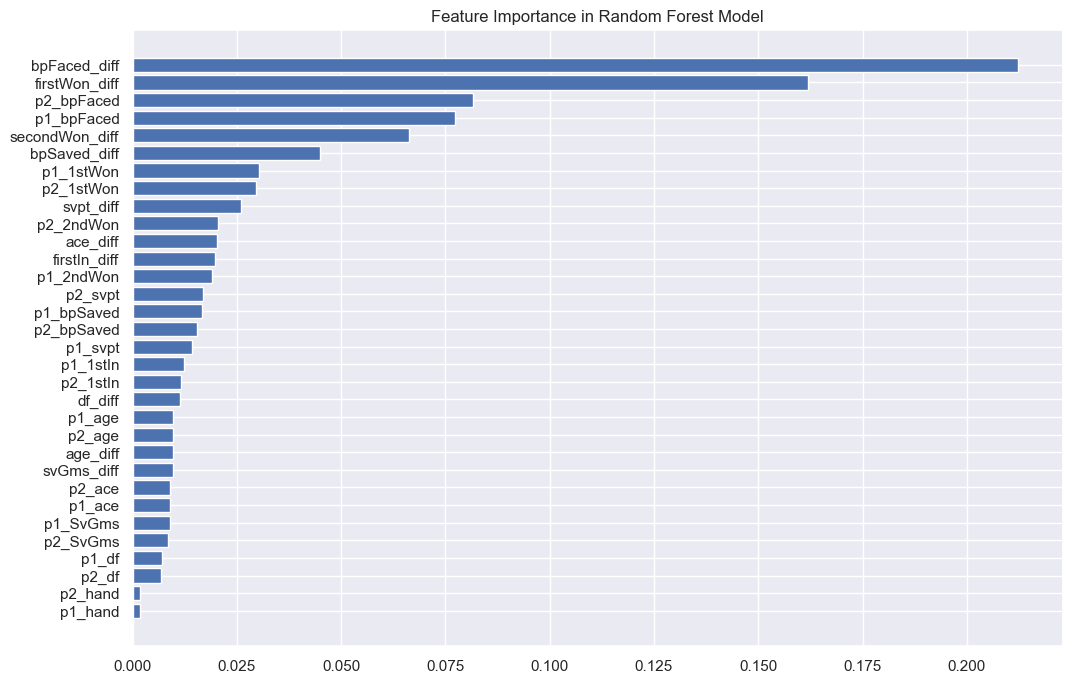

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = model.feature_importances_
# Match feature names to their importances
features = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importance in Random Forest Model")
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align="center")
plt.yticks(range(len(sorted_indices)), [features[i] for i in sorted_indices])
plt.gca().invert_yaxis()
plt.show()


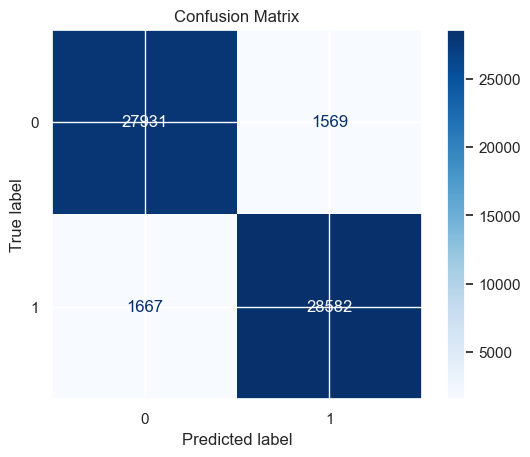

Accuracy: 0.9458400977422217
Precision: 0.9458471231854634
Recall: 0.9458400977422217
F1-Score: 0.9458410657419019


In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have your true labels (y_test) and predicted labels (y_pred)
# Example: y_pred = rf_model.predict(X_test)

# Step 1: Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Step 2: Create a confusion matrix display and plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Optional: use cmap to change color, like 'Blues' or 'Greens'
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_test (true labels) and y_pred (predicted labels) are available

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision (for binary classification, or specify average for multi-class)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

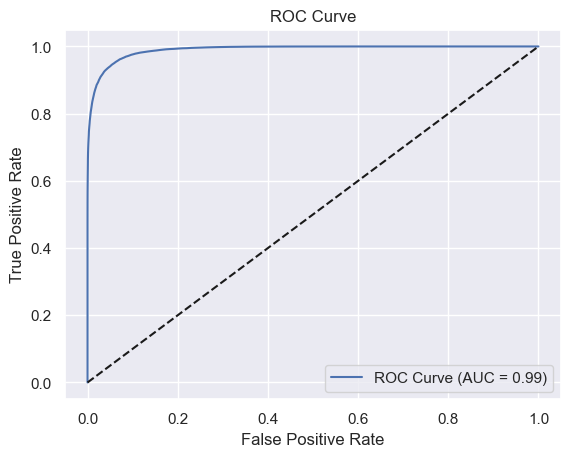

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming y_test (true labels) and y_pred_proba (predicted probabilities) are available
# For RandomForestClassifier, get probabilities with predict_proba()
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


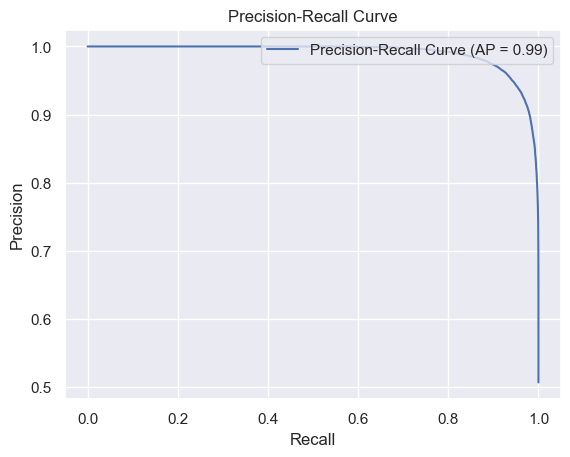

In [21]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming y_test (true labels) and y_pred_proba (predicted probabilities) are available
# For RandomForestClassifier, get probabilities with predict_proba()
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate average precision score
avg_precision = average_precision_score(y_test, y_pred_proba)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, label=f"Precision-Recall Curve (AP = {avg_precision:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.show()


In [49]:
twistdata = player_stats.sample(50)
twistdata.head(50)

,player_id,age,hand,ace,df,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced
4184,137018,20.500000,2,9.666667,4.000000,114.666667,66.666667,46.666667,22.666667,16.666667,6.333333,10.666667
2199,105637,22.375000,1,1.500000,4.750000,68.500000,45.000000,25.250000,11.000000,9.250000,6.750000,10.500000
1063,103514,30.563636,2,3.545455,3.000000,61.181818,40.000000,28.545455,10.363636,10.090909,3.000000,5.363636
1463,104425,27.675000,2,1.000000,2.375000,60.625000,40.125000,21.625000,9.125000,9.000000,4.125000,8.375000
3894,127463,20.600000,2,0.000000,2.000000,48.000000,27.000000,12.000000,8.000000,8.000000,7.000000,13.000000
4380,200039,21.697727,3,4.909091,2.636364,66.045455,38.750000,25.340909,12.727273,9.909091,3.545455,6.772727
318,101590,23.666667,2,2.555556,2.444444,62.333333,34.888889,24.444444,12.555556,9.888889,3.777778,7.000000
4132,134329,21.903030,3,6.707071,3.101010,73.989899,42.353535,29.797980,15.535354,11.292929,4.282828,7.121212
2033,105399,26.084507,2,6.760563,3.535211,70.436620,41.028169,30.563380,15.183099,11.169014,3.028169,5.042254
1991,105333,24.500000,2,6.000000,1.000000,61.000000,40.500000,28.000000,8.000000,8.500000,6.500000,9.000000


In [61]:
from itertools import combinations
import pandas as pd

# Initialize dictionary to keep track of wins
win_counts = {player_id: 0 for player_id in twistdata['player_id']}

# Generate pairwise matchups and simulate matches
for player1_id, player2_id in combinations(twistdata['player_id'], 2):
    # Get stats for both players
    player1_stats = twistdata[twistdata['player_id'] == player1_id].iloc[0]
    player2_stats = twistdata[twistdata['player_id'] == player2_id].iloc[0]
    
    # Create matchup features based on the stats of player1 and player2
    matchup_data = {
        'p1_age': player1_stats['age'],
        'p1_hand': player1_stats['hand'],
        'p1_ace': player1_stats['ace'],
        'p1_df': player1_stats['df'],
        'p1_svpt': player1_stats['svpt'],
        'p1_1stIn': player1_stats['1stIn'],
        'p1_1stWon': player1_stats['1stWon'],
        'p1_2ndWon': player1_stats['2ndWon'],
        'p1_SvGms': player1_stats['SvGms'],
        'p1_bpSaved': player1_stats['bpSaved'],
        'p1_bpFaced': player1_stats['bpFaced'],
        
        'p2_age': player2_stats['age'],
        'p2_hand': player2_stats['hand'],
        'p2_ace': player2_stats['ace'],
        'p2_df': player2_stats['df'],
        'p2_svpt': player2_stats['svpt'],
        'p2_1stIn': player2_stats['1stIn'],
        'p2_1stWon': player2_stats['1stWon'],
        'p2_2ndWon': player2_stats['2ndWon'],
        'p2_SvGms': player2_stats['SvGms'],
        'p2_bpSaved': player2_stats['bpSaved'],
        'p2_bpFaced': player2_stats['bpFaced'],
        
        # Calculate differences for each stat as additional features
        'age_diff': player1_stats['age'] - player2_stats['age'],
        'ace_diff': player1_stats['ace'] - player2_stats['ace'],
        'df_diff': player1_stats['df'] - player2_stats['df'],
        'svpt_diff': player1_stats['svpt'] - player2_stats['svpt'],
        'bpSaved_diff': player1_stats['bpSaved'] - player2_stats['bpSaved'],
        'bpFaced_diff': player1_stats['bpFaced'] - player2_stats['bpFaced'],
        'firstIn_diff': player1_stats['1stIn'] - player2_stats['1stIn'],
        'firstWon_diff': player1_stats['1stWon'] - player2_stats['1stWon'],
        'secondWon_diff': player1_stats['2ndWon'] - player2_stats['2ndWon'],
        'svGms_diff': player1_stats['SvGms'] - player2_stats['SvGms']
    }
    
    matchup_df = pd.DataFrame([matchup_data])
    
    # Predict the outcome of the match
    win_probability = model.predict_proba(matchup_df)[:, 1][0]  # Probability that player1 wins
    
    # Increment win counts based on the prediction
    if win_probability >= 0.5:
        win_counts[player1_id] += 1
    else:
        win_counts[player2_id] += 1

# Calculate win rates and rank players
total_matches = len(player_stats) - 1  # Total matches per player
win_rates = {player: wins / total_matches for player, wins in win_counts.items()}

# Create a ranking DataFrame
ranking_df = pd.DataFrame.from_dict(win_rates, orient='index', columns=['win_rate'])
ranking_df = ranking_df.sort_values(by='win_rate', ascending=False)
ranking_df['rank'] = range(1, len(ranking_df) + 1)

# Reset the index to turn player IDs into a regular column and give it a label
ranking_df = ranking_df.reset_index()
ranking_df = ranking_df.rename(columns={'index': 'player_id'})

# Display the player rankings with labeled columns
print(ranking_df)



    player_id  win_rate  rank
0      212721  0.008235     1
1      137018  0.008067     2
2      126729  0.007899     3
3      206861  0.007563     4
4      105399  0.007563     5
5      103716  0.007227     6
6      200175  0.007227     7
7      101727  0.007227     8
8      202420  0.006891     9
9      105882  0.006891    10
10     104371  0.006387    11
11     100990  0.006218    12
12     134329  0.006218    13
13     101844  0.006050    14
14     200474  0.005882    15
15     111809  0.005882    16
16     124079  0.005546    17
17     103114  0.005378    18
18     103514  0.005378    19
19     202235  0.004874    20
20     200482  0.004874    21
21     101590  0.004706    22
22     106412  0.004706    23
23     200039  0.004370    24
24     206926  0.004202    25
25     103963  0.004034    26
26     103459  0.003866    27
27     105333  0.003697    28
28     106143  0.003361    29
29     207293  0.003193    30
30     110548  0.003193    31
31     105637  0.002857    32
32     103

In [63]:
ranking_df.head(5)

,player_id,win_rate,rank
0,212721,0.008235,1
1,137018,0.008067,2
2,126729,0.007899,3
3,206861,0.007563,4
4,105399,0.007563,5


In [57]:
topdata = pd.read_csv("top_players_overall.csv")


,player_id,rating,rating_deviation
0,206173,3003.635468,32.019863
1,207989,2804.705637,37.580408
2,106421,2738.181716,30.938790
3,104925,2731.813171,56.994858
4,106401,2691.824320,44.424801
5,200282,2657.872673,28.222477
6,105777,2634.555626,25.922753
7,126094,2571.995387,23.243015
8,126205,2563.673371,31.882959
9,100644,2562.162552,25.345723


In [65]:
# Suppose your other DataFrame is named `next_df`

# Extract the list of player IDs from ranking_df
player_ids = ranking_df['player_id'].tolist()

# Filter next_df to only include rows where player_id is in the player_ids list
filtered_df = topdata[topdata['player_id'].isin(player_ids)]

# Display the filtered DataFrame
print(filtered_df)


      player_id       rating  rating_deviation
73       200175  2273.659598         26.641303
144      124079  2148.599089         22.091439
284      105882  2019.517781         28.217241
390      134329  1964.036035         43.495867
556      202235  1898.892881         46.157821
851      202420  1813.530240         49.991784
859      101727  1812.416666         35.568902
1098     104371  1760.289261         44.293619
1551     212721  1673.654264        285.669028
1711     111809  1648.729717        159.825465
1717     105399  1647.494685         47.664088
1953     200039  1604.586256         66.588316
2103     103114  1580.876851         40.648976
2211     106412  1561.483762         60.441517
2337     206926  1539.261792        162.597333
2468     200474  1511.723246        132.808857
2582     101844  1490.892015        115.263913
2593     207520  1489.939427        340.173984
2671     105549  1480.672734        331.166702
2828     126729  1468.275288        319.725326
2965     1061

In [ ]:
# Sample data
import pandas as pd

data = {
    'category': ['A', 'B', 'A', 'C', 'B', 'A'],
    'value': [10, 20, 15, 10, 25, 30]
}
df = pd.DataFrame(data)

# Filter the DataFrame where 'category' is 'A'
filtered_df = df[df['category'] == 'A']

# Display the result
filtered_df


In [24]:
# from sklearn.tree import plot_tree

# # Assuming rf_model is your RandomForestClassifier and X_train is your training data
# tree = model.estimators_[0]  # Select the first tree

# plt.figure(figsize=(20, 10))
# plot_tree(tree, feature_names=X_train.columns, class_names=[str(cls) for cls in model.classes_], filled=True)
# plt.title("Tree Visualization (First Tree in Random Forest)")
# plt.show()
